In [1]:
library(tidyverse)
plot.scale <- 1
options(
        jupyter.rich_display = FALSE,
        repr.plot.width = 16/plot.scale,
        repr.plot.height = 9/plot.scale)
ggplot2::theme_set(theme_minimal())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- haven::read_sav("/Users/stawager/Repos/dataAnalysisR_ifs2025/dane20250311/dataPLUS.sav")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_bar()`).”


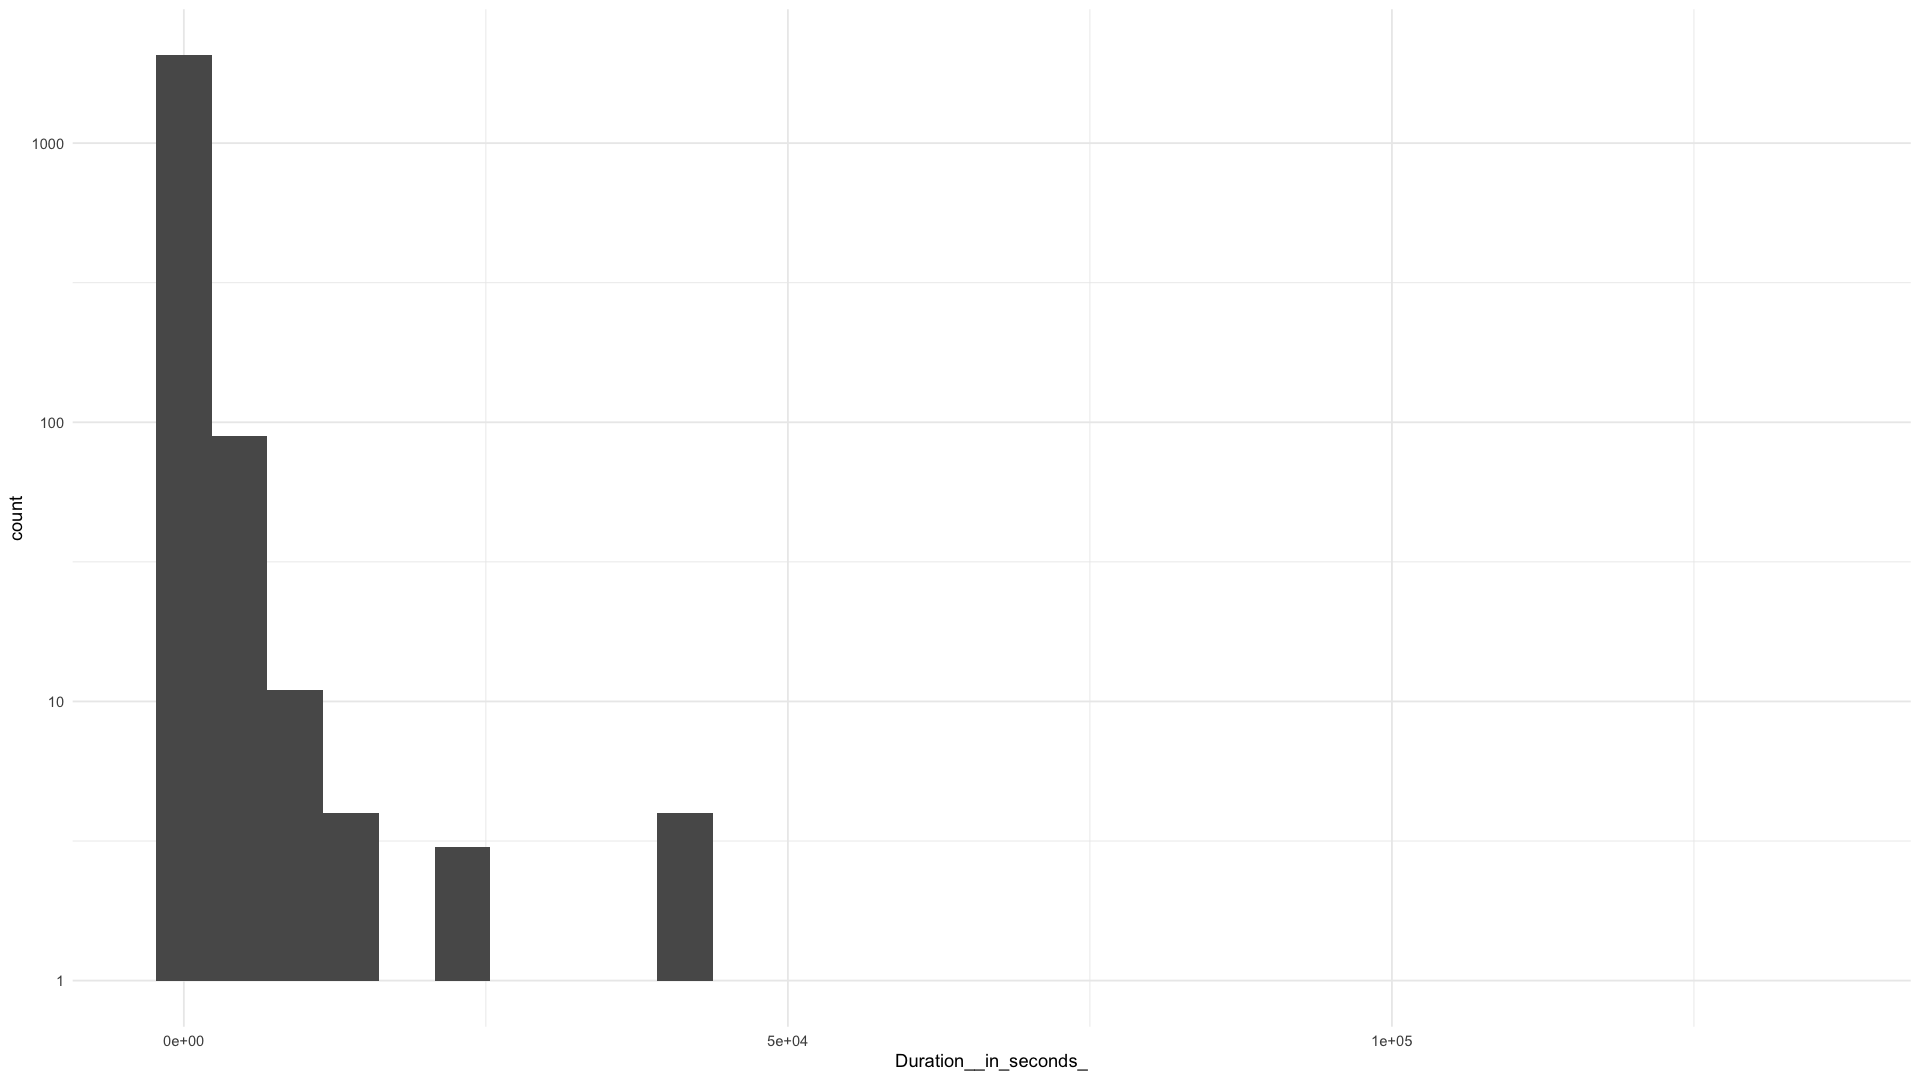

In [3]:
ggplot(df) +
    aes(x = Duration__in_seconds_) +
    geom_histogram() + 
    scale_y_log10()

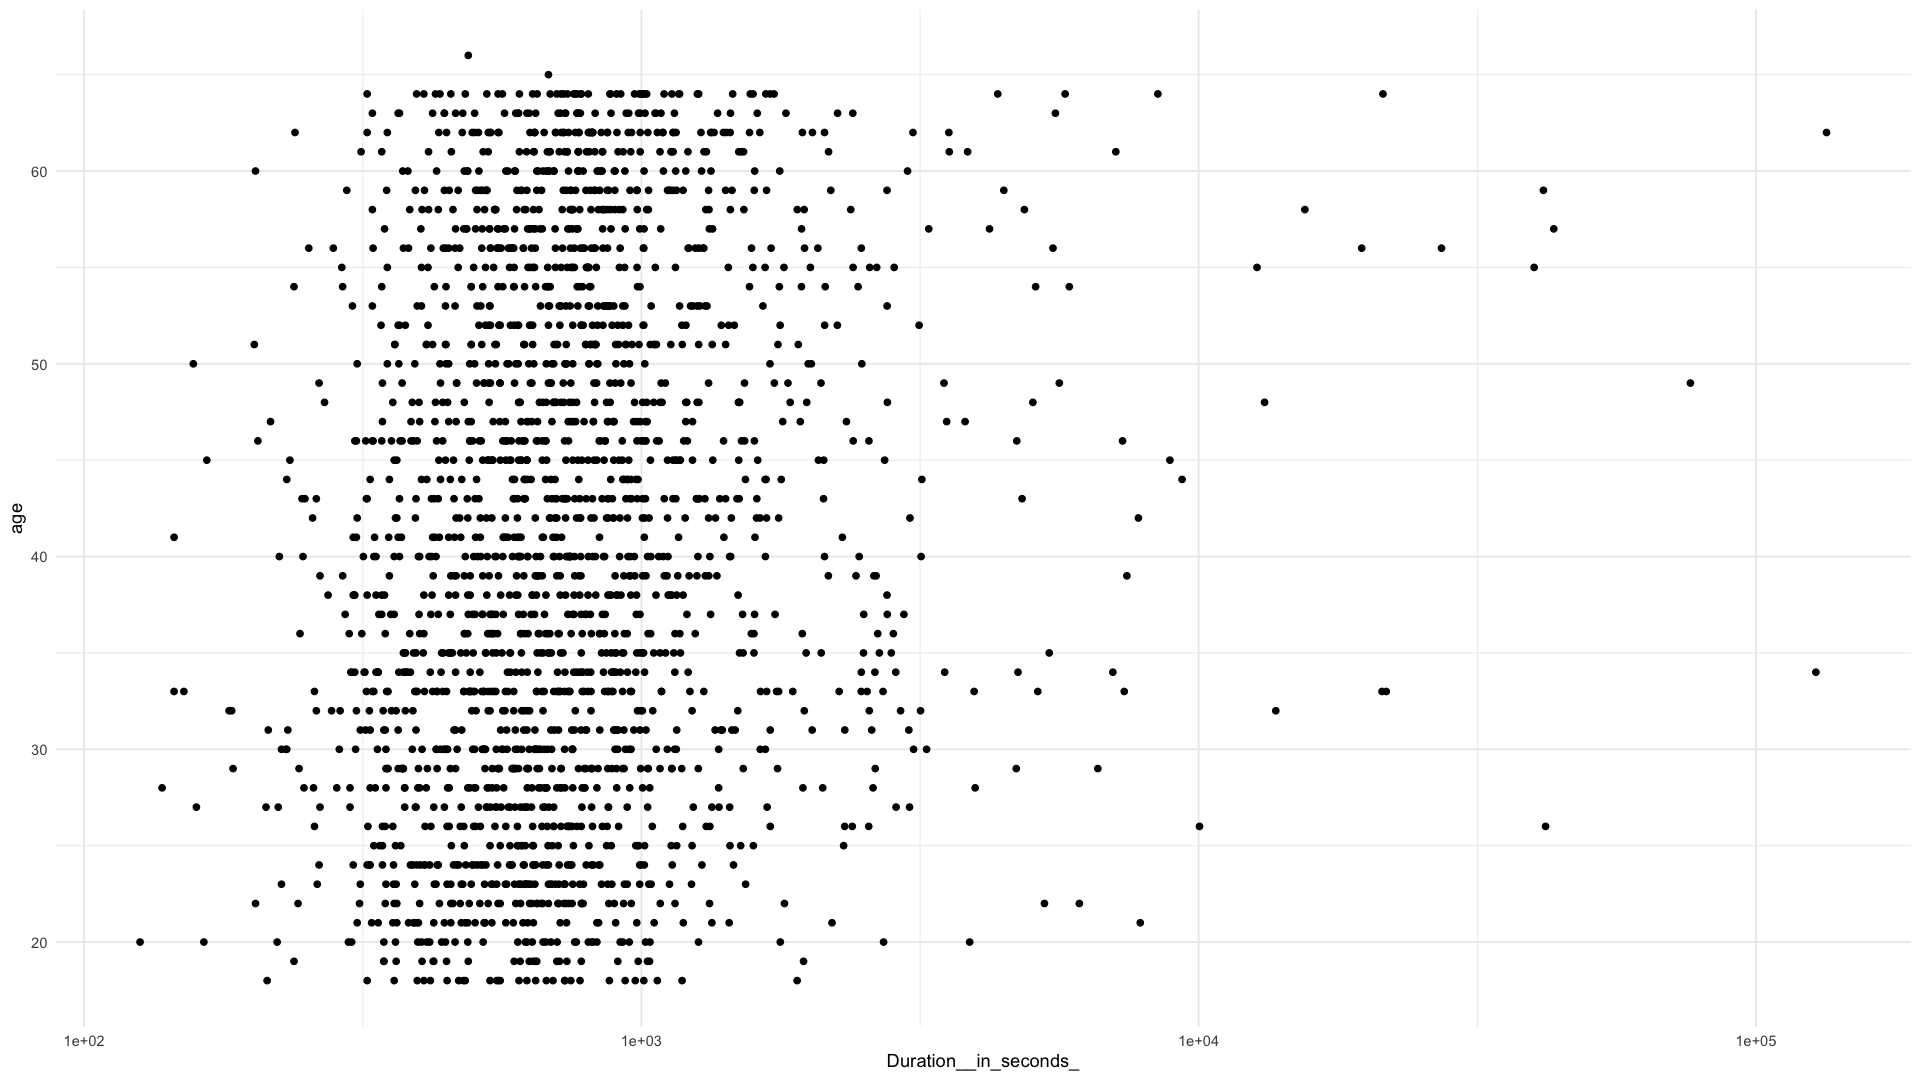

In [4]:
ggplot(df) + 
    aes(x = Duration__in_seconds_, y = age) + 
    scale_x_log10() +
    geom_point()

In [5]:
summary(df$Duration__in_seconds_)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   126.0    512.2    698.0   1200.0    971.8 133860.0 

In [6]:
df %>%
    select(Duration__in_seconds_) %>%
    arrange(desc(Duration__in_seconds_)) %>%
    head(10)

   Duration__in_seconds_
1  133860               
2  128100               
3   76275               
4   43365               
5   41921               
6   41551               
7   39990               
8   27274               
9   21705               
10  21413               

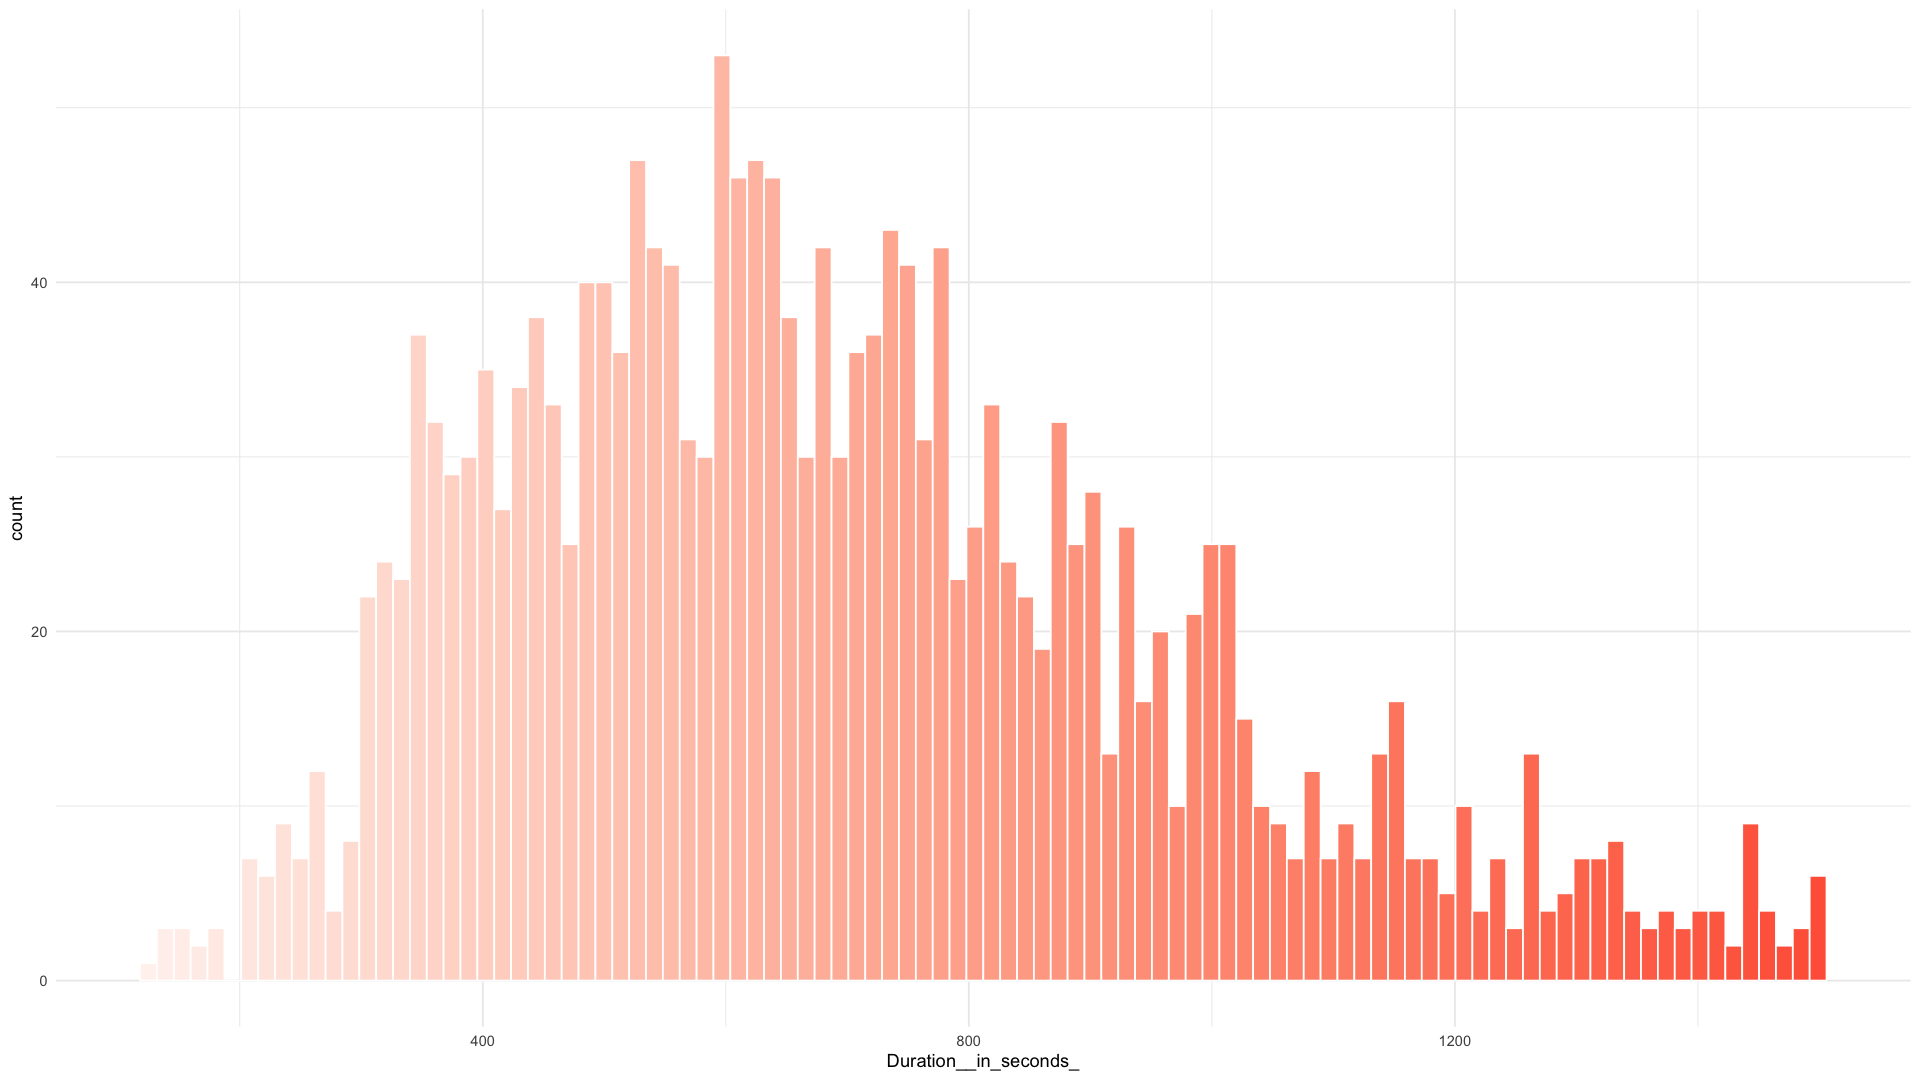

In [7]:
df %>%
    filter(Duration__in_seconds_ <= 1500) %>%
    ggplot(aes(x = Duration__in_seconds_, fill = after_stat(x))) + 
    geom_histogram(bins = 100, color = "white") +  
    scale_fill_gradient2(low = "steelblue", mid = "white", high = "tomato", lims) +  
    guides(fill = "none")


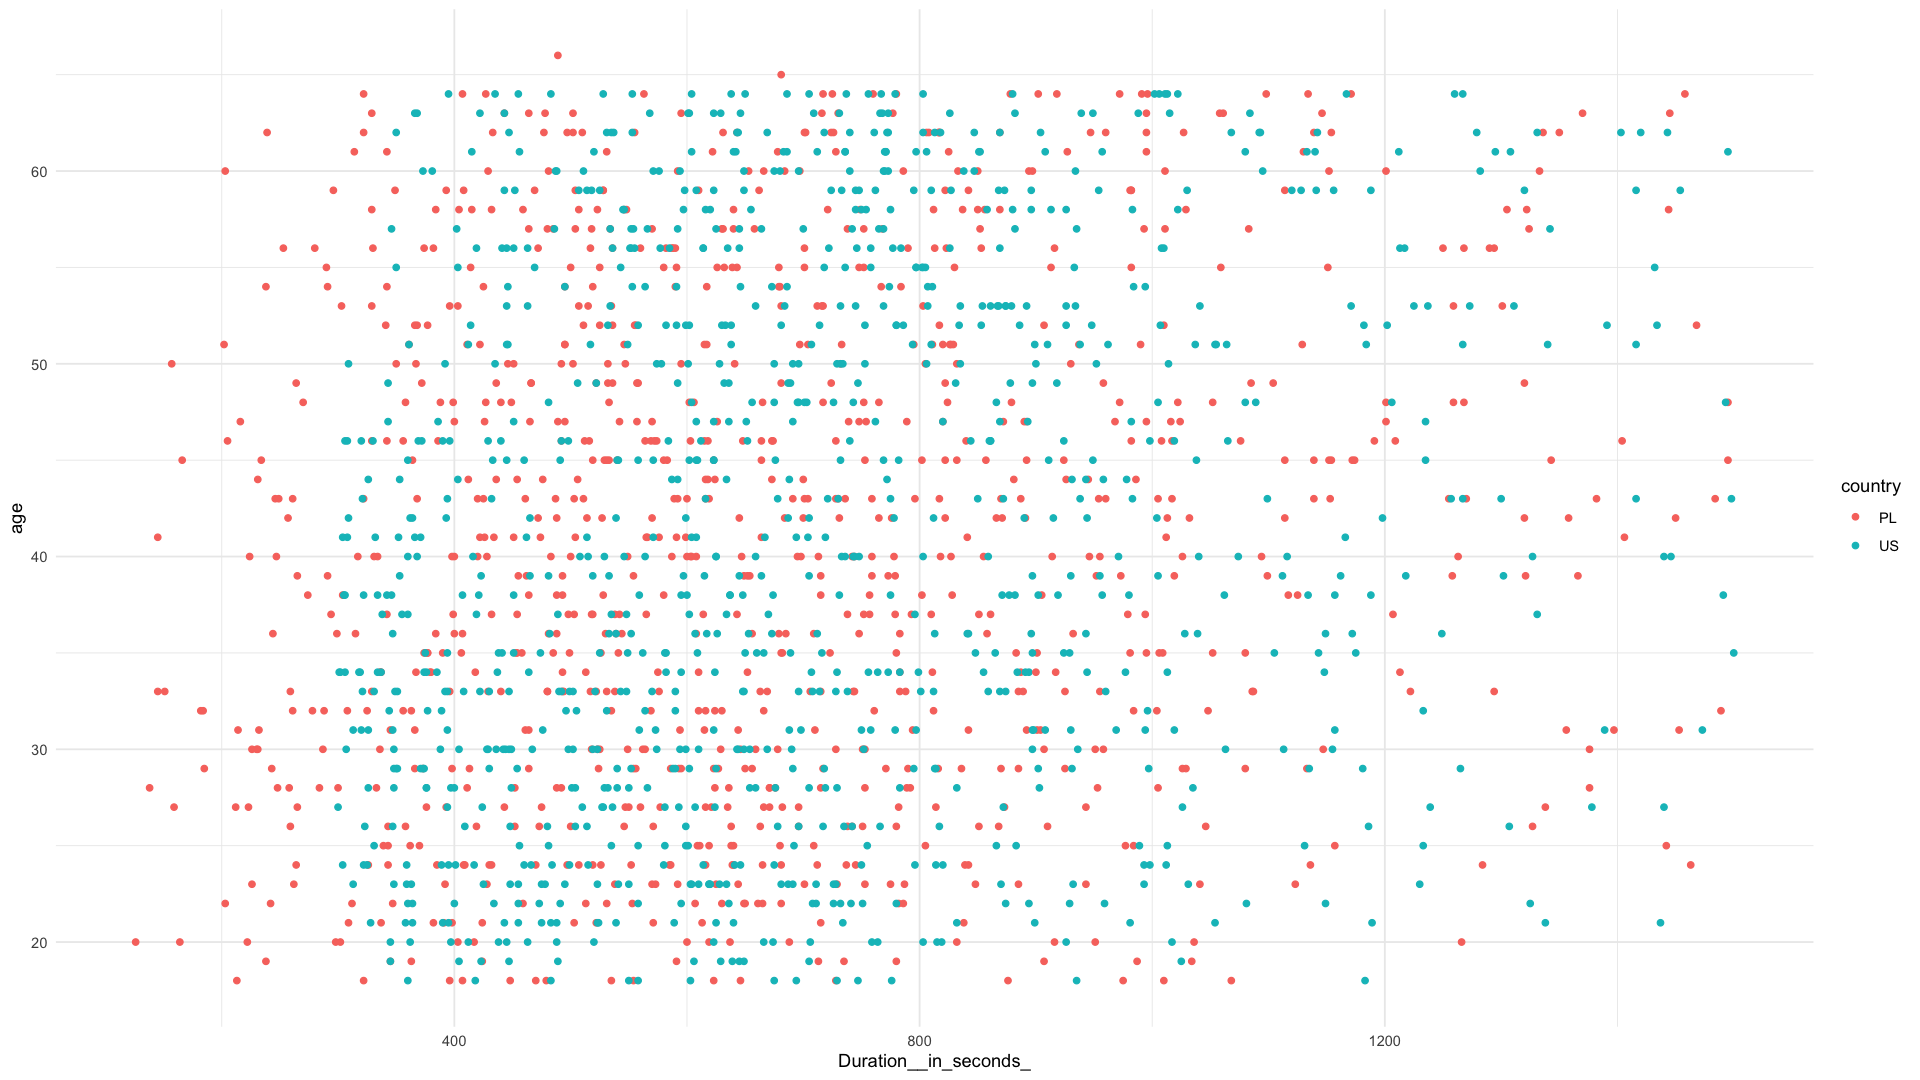

In [8]:
df %>%
    filter(Duration__in_seconds_ <= 1500) %>%
    ggplot() +
        aes(x = Duration__in_seconds_, y = age, color = country) +
        geom_point()

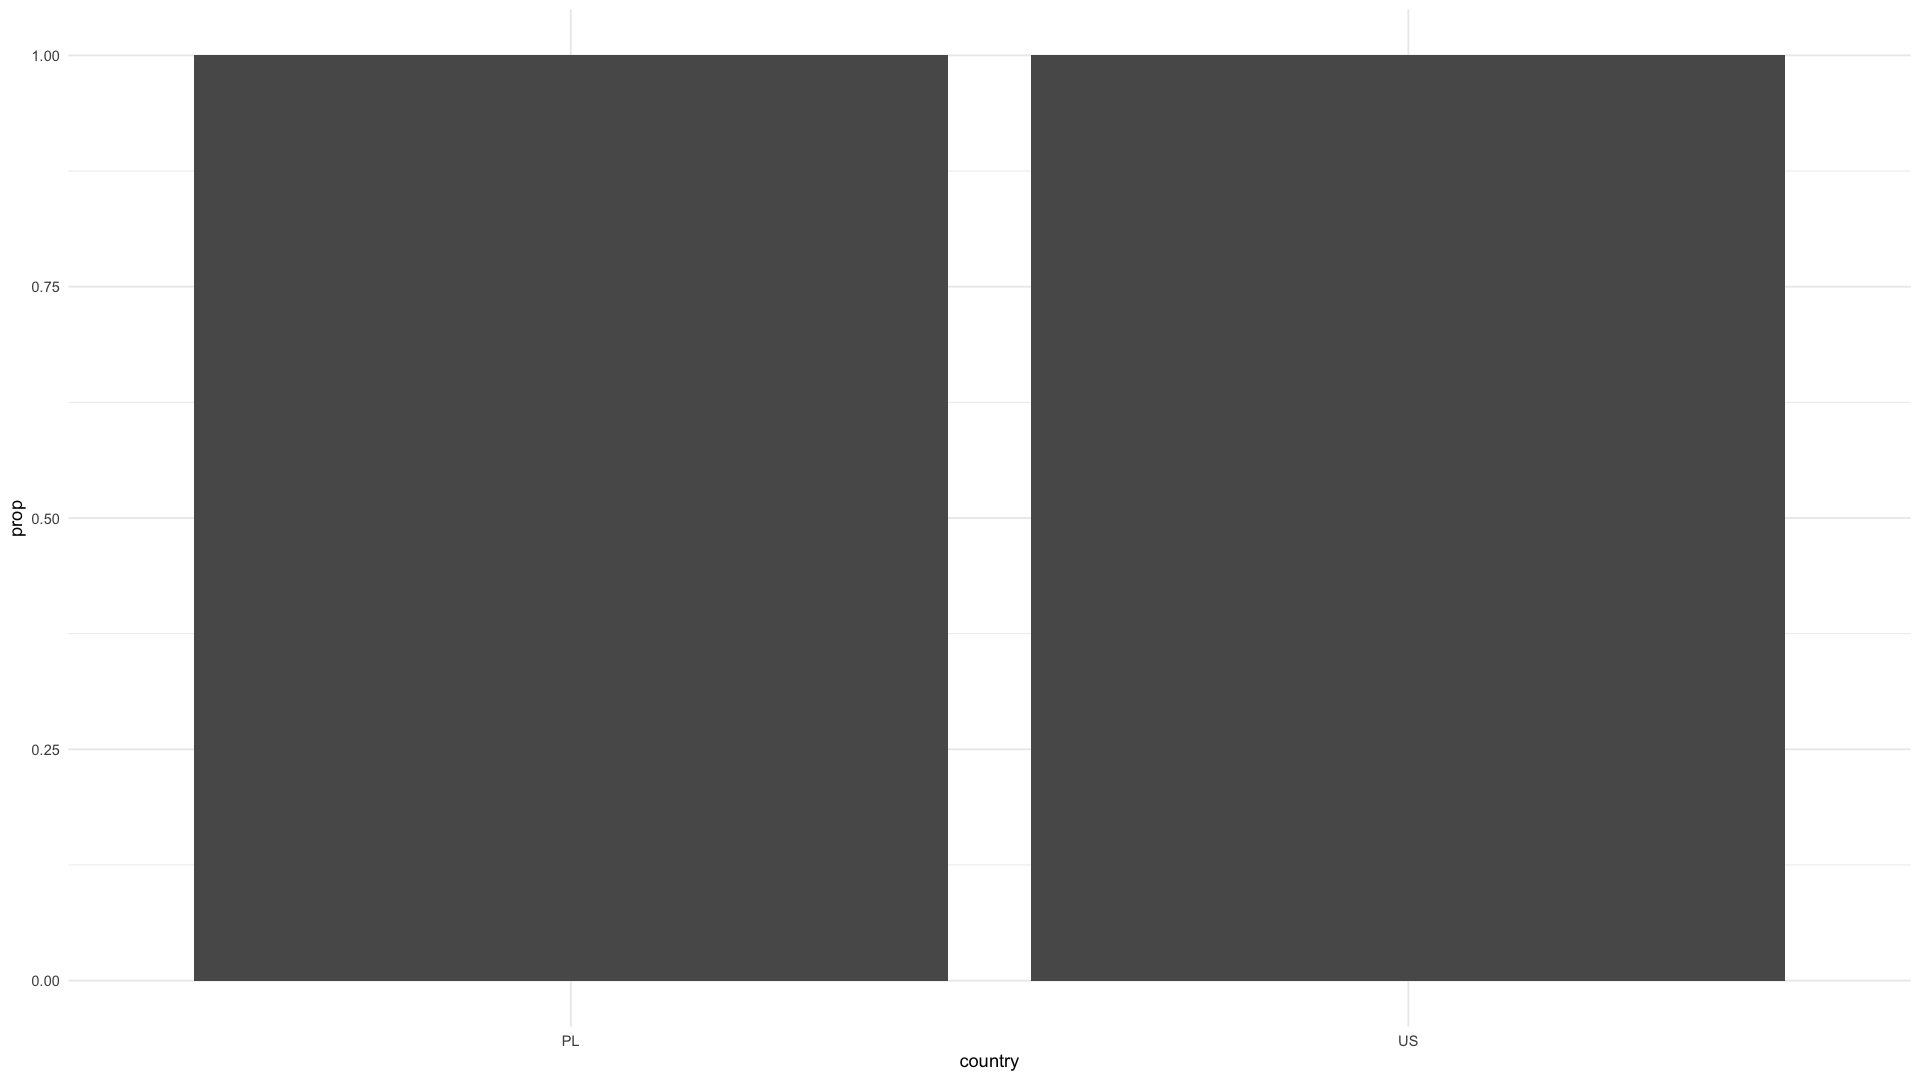

In [9]:
df %>%
    ggplot() +
        aes(x = country, y = after_stat(prop)) +
        geom_bar()

___

1. Zrób wykres słupkowy prezentujący różnice procentowe pomiędzy PL i US dla zmiennej edu.level. Niech kraje różnią się kolorami. Poeksperymentuj z argumentem estetyk position wybierając wartości dodge , a później fill. Za pomocą argumentów funkcji ggplot: xlab i ylab dodaj etykiety osi, odpowiednio: „Poziom wykształcenia” i „Procenty”. Wartości na osi T de facto nie pokazują teraz procentów. Jak to zmienić? (podpowiedź: możesz skorzystać z gotowych funkcji ggplot np. w ramach scale_y_continuous)

In [22]:
df$gender <- factor(df$gender, 
                    levels = c(1, 2, 3, 4),
                    labels = c("kobieta", "mężczyzna", "inna", "wolę nie odpowiadać"))

df$edu.level <- factor(df$edu.level, 
                       levels = c(1, 2, 3),
                       labels = c("podstawowe", "średnie", "wyższe"))

df$edu.field <- factor(df$edu.field, 
                       levels = c(1, 2, 3, 4),
                       labels = c("humanistyczne lub społeczne", 
                                  "ścisłe lub techniczne", 
                                  "biologiczne lub medyczne", 
                                  "nie dotyczy"))

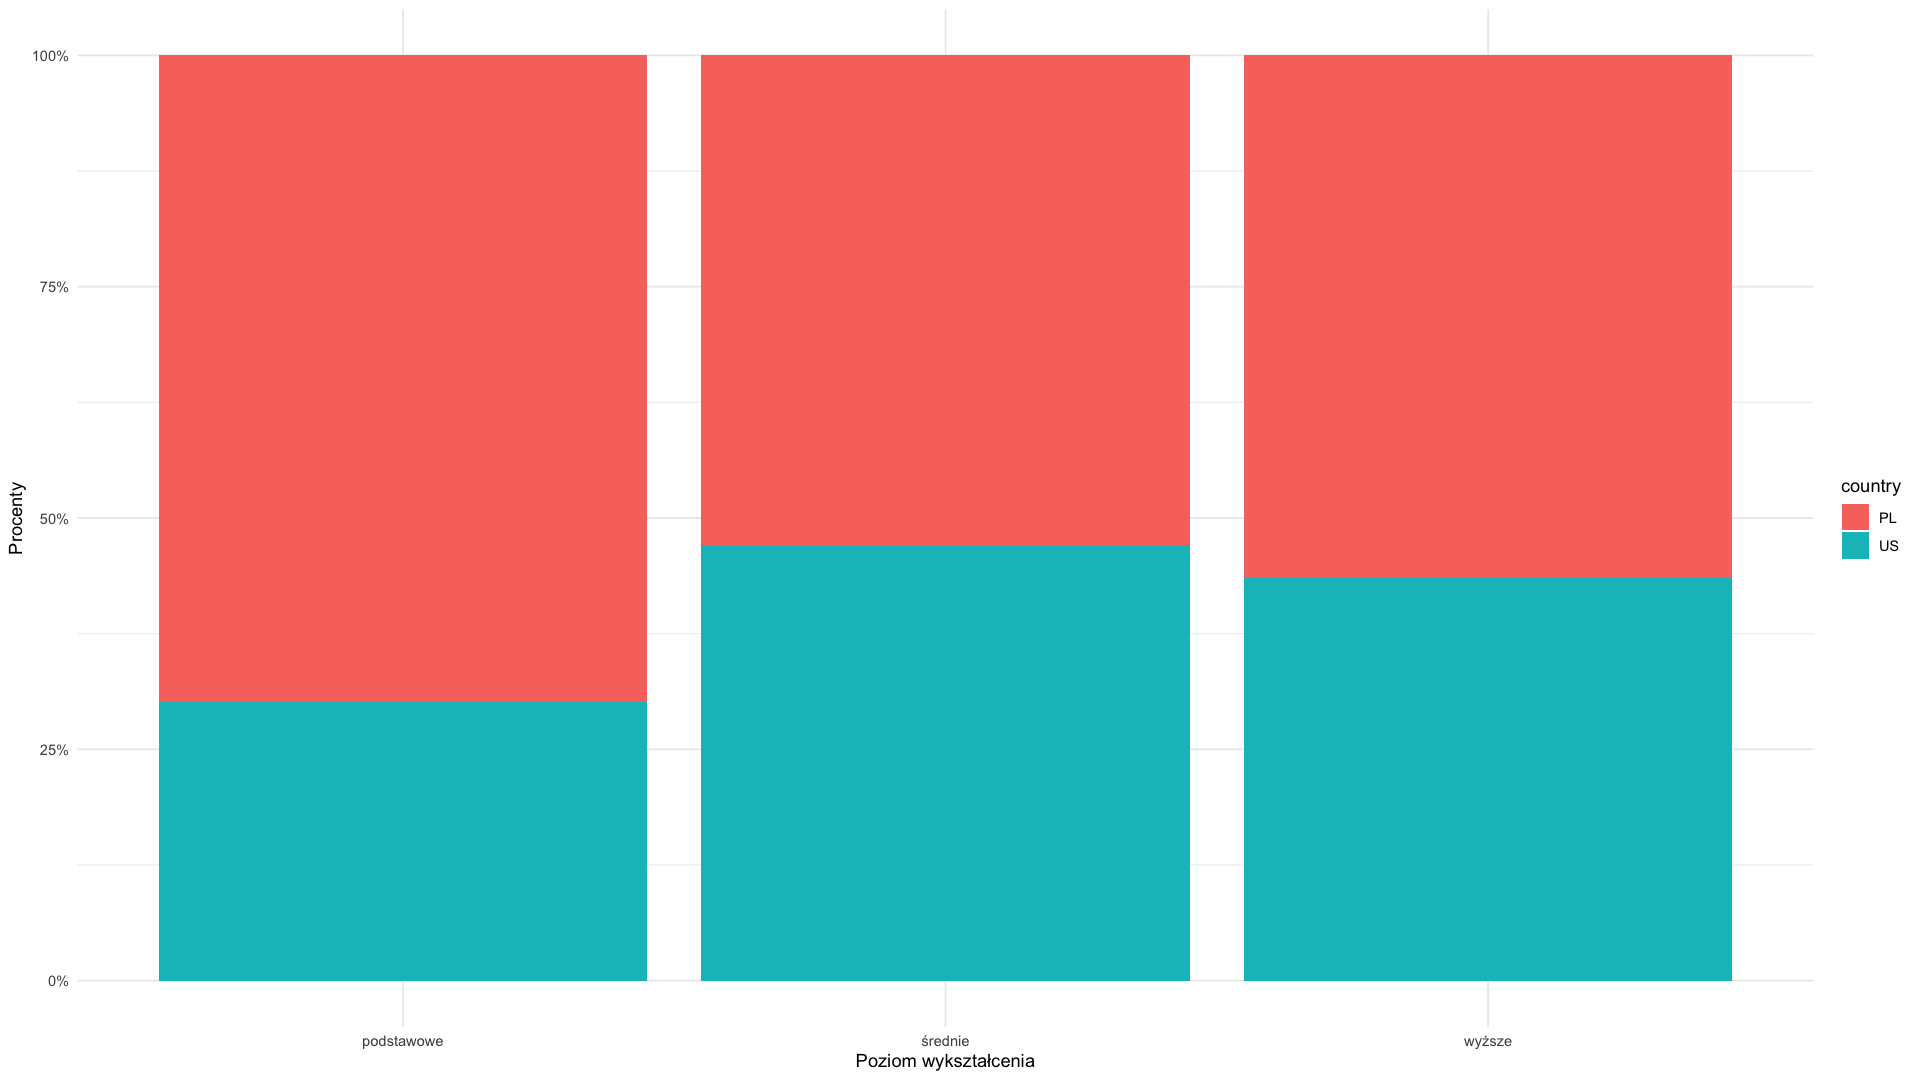

In [20]:
ggplot(na.omit(df)) +
    aes(x = as.factor(edu.level), fill = country, y = after_stat(count/sum(count)*100)) + 
    geom_bar(position = "fill") +
    scale_y_continuous(labels = scales::percent_format()) +
    labs(
        x = "Poziom wykształcenia",
        y = "Procenty")

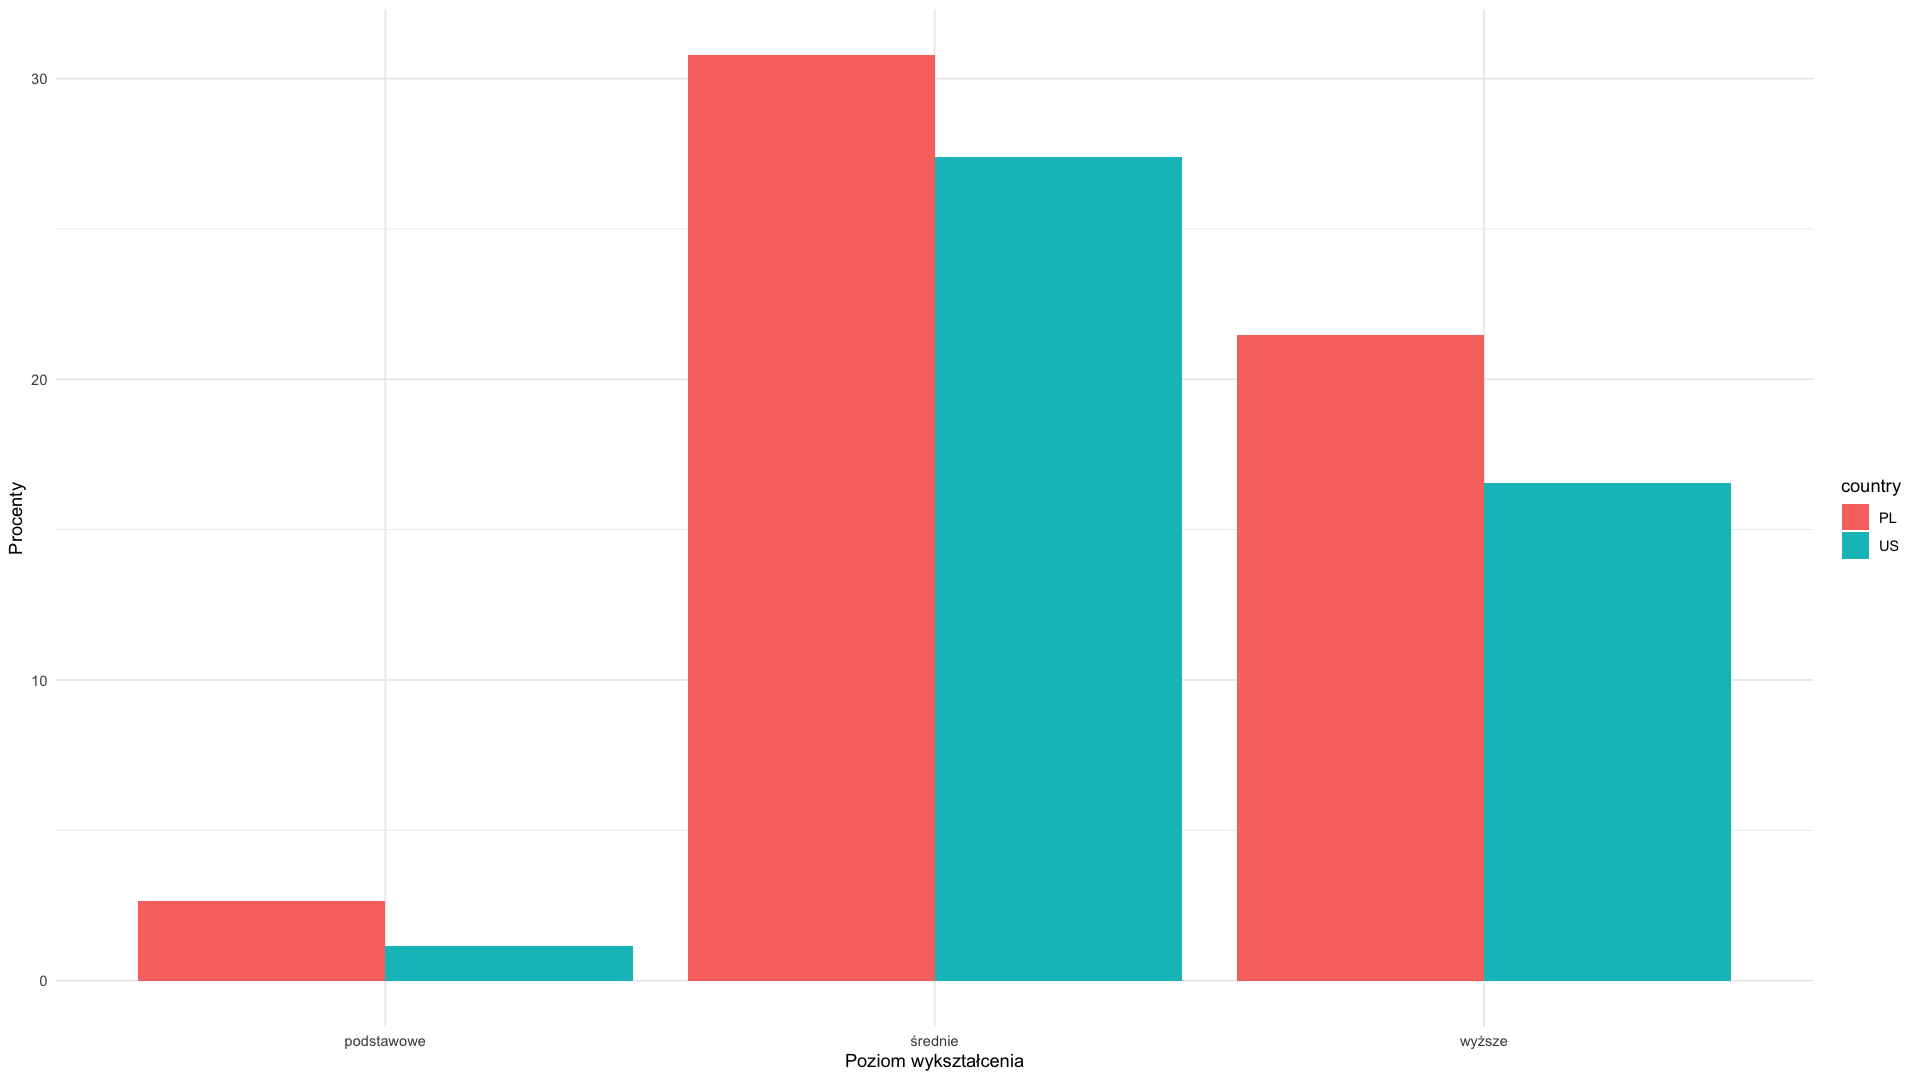

In [21]:
ggplot(na.omit(df)) +
    aes(x = as.factor(edu.level), fill = country, y = after_stat(count/sum(count)*100)) + 
    geom_bar(position = "dodge") +
    labs(
        x = "Poziom wykształcenia",
        y = "Procenty")

2. Porównaj za pomocą wykresu skrzynkowego (geom_boxplot) rozkład wieku dla płci, wcześniej odfiltrowując wartości płci >2. Pamiętaj, że boxplot wymaga zmiennej grupującej w postaci faktora! Być może będziesz musiał zmienić rodzaj zmiennej!  
3. Do uzyskanego wykresu dołóż: tytuł, nazwy osi (warstwa labs) oraz etykiety zmiennej płeć (1 – kobieta, 2 – mężczyzna). Do tej ostatniej operacji będziesz potrzebować funkcji scale_x_discrete. W razie wątpliwości wykorzystaj pomoc pakietu, by jej użyć.

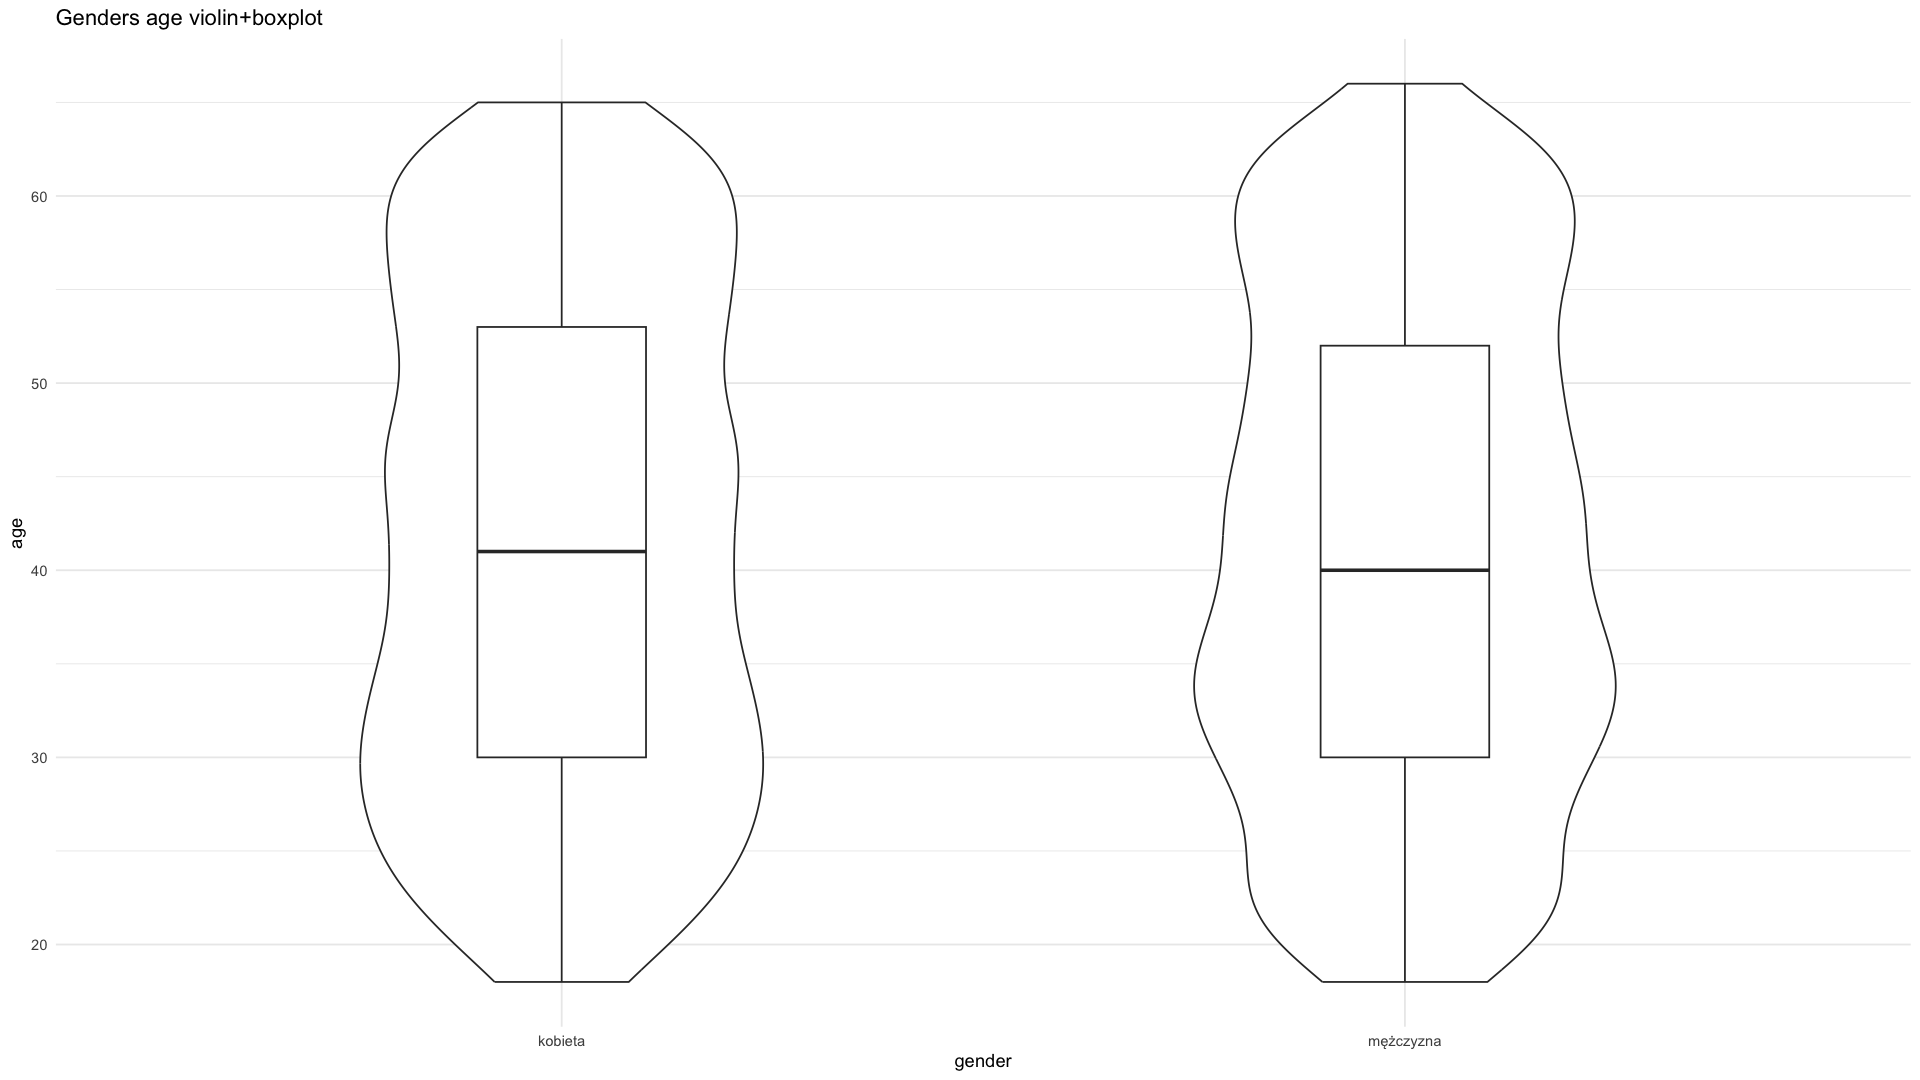

In [32]:
df %>%
    filter(gender %in% c("kobieta", "mężczyzna")) %>%
    ggplot() +
        aes(x = gender, y = age) +
        geom_violin(width = .5) +
        geom_boxplot(width = .2) +
        labs(
            title = "Genders age violin+boxplot",
        )

4. Do powstałego wykresu skrzynkowego dołóż porównanie pomiędzy krajami na 2 wykresach ustawionych w polu wykresu obok siebie. Użyj do tego funkcji facet_wrap. Odpowiedz na pytanie: dla której płci i w którym kraju występuje u badanych najniższa wartość mediany wieku?

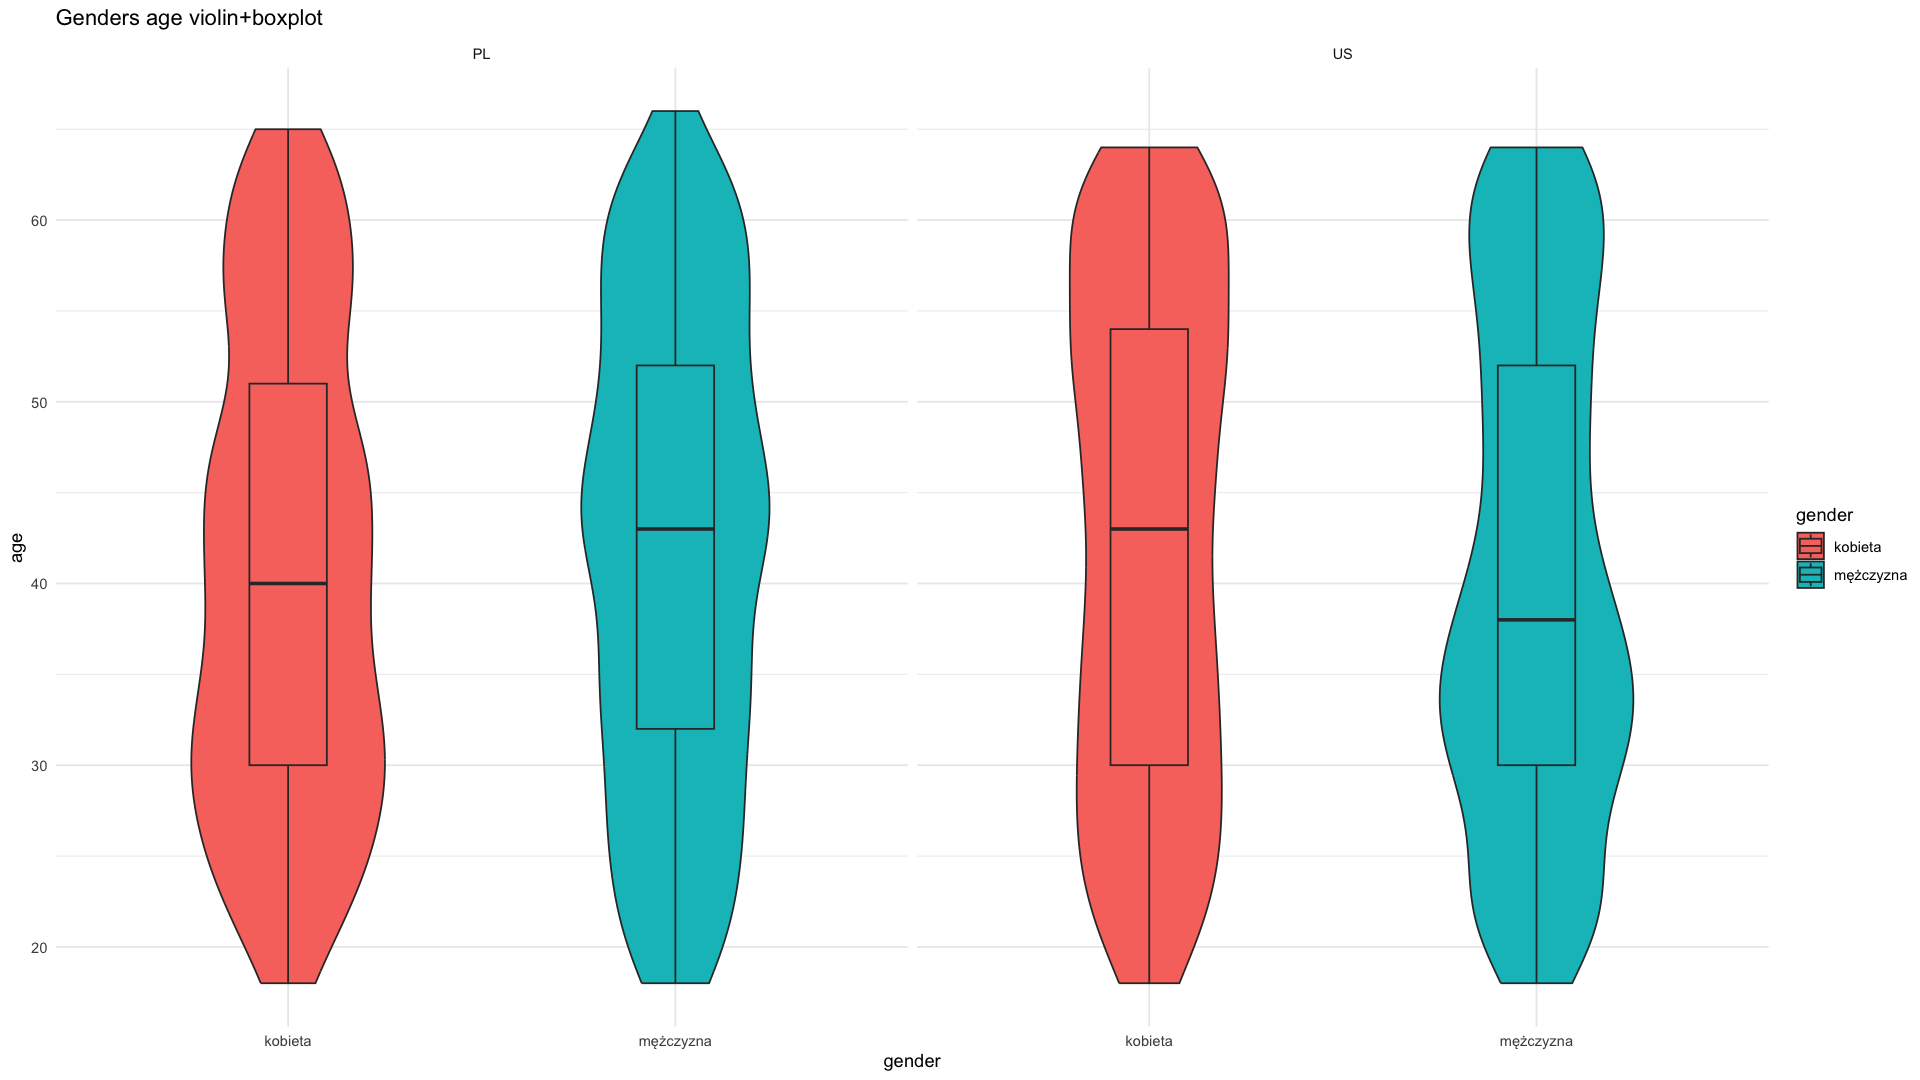

In [ ]:
df %>%
    filter(gender %in% c("kobieta", "mężczyzna")) %>%
    ggplot() +
        aes(x = gender, y = age, fill = gender) +
        geom_violin(width = .5,) +
        geom_boxplot(width = .2) +
        facet_wrap(~ country) + 
        labs(
            title = "Genders age violin+boxplot",
        )

In [53]:
df %>%
    filter(gender %in% c("kobieta", "mężczyzna")) %>%
    group_by(country, gender) %>%
    summarise(
        median_age = median(age, na.rm = TRUE)) %>%
    arrange(median_age)

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


  country gender    median_age
1 US      mężczyzna 38        
2 PL      kobieta   40        
3 PL      mężczyzna 43        
4 US      kobieta   43        

W US wsrod mezczyzn jest najnizsza mediana wieku - 38